In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

graph_type = "fb"
reconstruct_type = "ra"
loc_type = "pearson"
r = 0.1
beta = 0.95
dj_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Collect data grouped by relative k level (index)
k_groups = {}  # maps k-level index to (x, y, yerr)

for dj in dj_list:
    filename =f"../rec_{reconstruct_type}_dj{int(dj*100)}_{graph_type}_{loc_type}_r{int(r*100)}_beta{int(beta*100)}.csv"
    path = os.path.join("data", filename)

    df = pd.read_csv(path, engine="python", skiprows=1)
    k_vals = df["k"].values
    precs = df["prec"].values
    errs = df["std_err"].values

    for i, (k, prec, err) in enumerate(zip(k_vals, precs, errs)):
        if i not in k_groups:
            k_groups[i] = {"dj_vals": [], "precs": [], "errs": []}
        k_groups[i]["dj_vals"].append(dj)
        k_groups[i]["precs"].append(prec)
        k_groups[i]["errs"].append(err)

# Plot each k-level group with its own color and label
labels = ["0dj", r"0.5dj", "1dj", "2dj", "3dj", "5dj", "8dj"]  # adjust if needed
colors = plt.cm.viridis(np.linspace(0, 1, len(k_groups)))

for i, (group_id, data) in enumerate(k_groups.items()):
    plt.errorbar(
        data["dj_vals"], data["precs"], yerr=data["errs"],
        fmt='o--', capsize=4, label=labels[group_id], color=colors[i]
    )

plt.xlabel("dj (Observer density)")
plt.ylabel("Precision")
plt.title(f"{graph_type.upper()} / {reconstruct_type.upper()} / {loc_type}")
plt.grid(True)
plt.legend(title="k size")
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data\\../rec_srw_dj0_email_pearson_r10_beta95.csv'

c:\Users\cp\PW\praca_magisterska\PW-source-loc-rec\python\helpers.py:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Ilość zrekonstruowanych linków", loc="upper right", frameon=False)


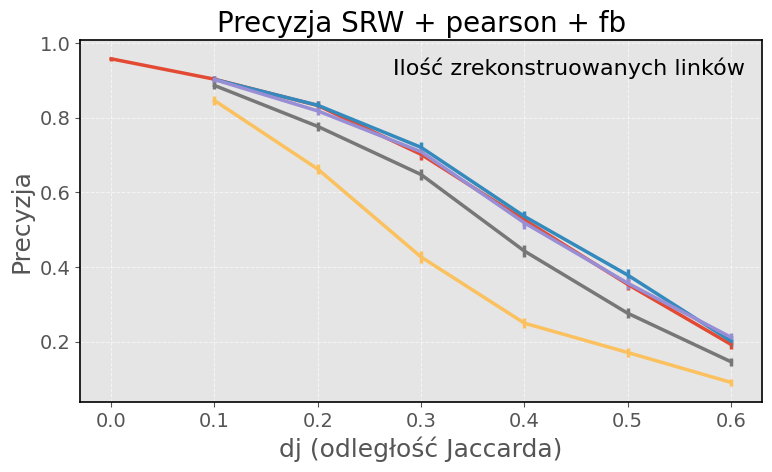

In [1]:
from helpers import reconstruction_plots

graph_type = "fb"
reconstruct_type = "srw"
loc_type = "pearson"
r = 0.1
beta = 0.95
dj_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
labels = ["0dj","0.25dj", "0.5dj", "1dj", "2dj"]

reconstruction_plots(graph_type, reconstruct_type, loc_type, r, beta, dj_list, labels)

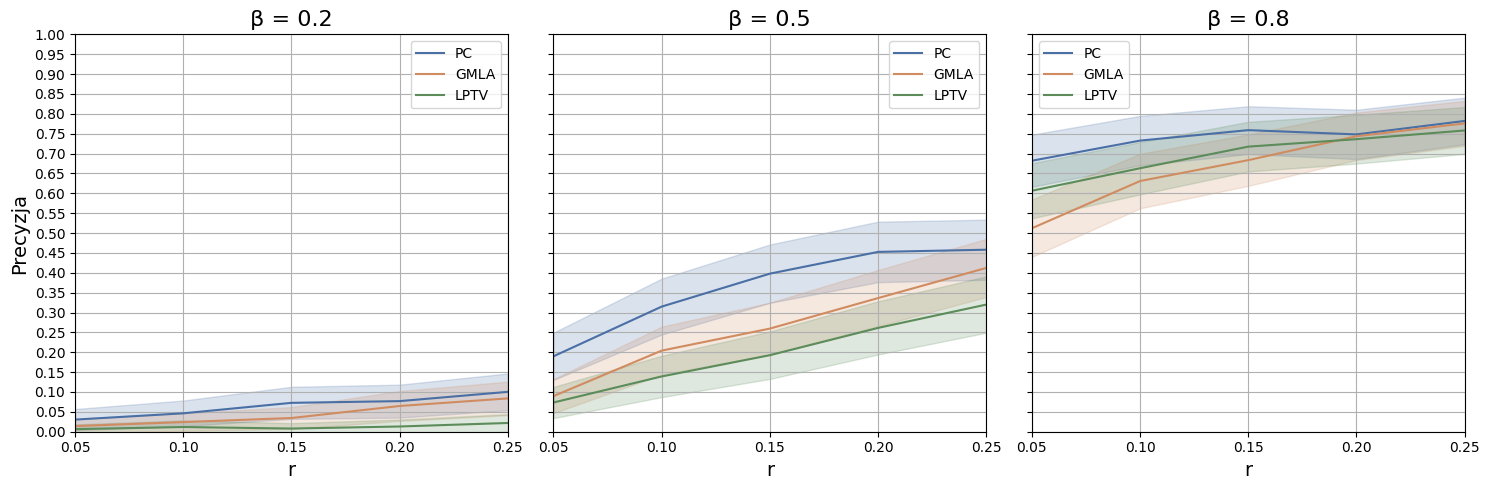

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

loc_labels = ["PC", "GMLA", "LPTV"]
loc_colors = ["#4A6FA5", "#D08C60", "#5B8C5A"]

graph_type = "email"
loc_types = ["pearson", "gmla", "lptva"]
betas = [0.2, 0.5, 0.8]
r_list = np.linspace(0.05, 0.25, 5)

def get_localisation_data_from_file(path: str):
    with open(path, "r") as file:
        lines = file.readlines()[2:]
        vals = [float(line.split(",")[1]) for line in lines]
    mean_val = float(np.mean(vals))
    err_val  = float(5 * np.std(vals) / math.sqrt(len(vals)))  # keep same convention
    return mean_val, err_val

# ----------- plotting -----------
fig, axes = plt.subplots(1, len(betas), figsize=(15, 5), sharey=True)

for ax, beta in zip(axes, betas):
    for loc_type, loc_label, loc_color in zip(loc_types, loc_labels, loc_colors):
        values, errors = [], []
        for r in r_list:
            path = f'../data/loc_{graph_type}_{loc_type}_r{int(r*100)}_beta{int(100*beta)}.csv'
            v, e = get_localisation_data_from_file(path)
            values.append(v)
            errors.append(e)
        values = np.array(values)
        errors = np.array(errors)

        line, = ax.plot(r_list, values, label=loc_label, color=loc_color)
        ax.fill_between(r_list, values - errors, values + errors,
                        color=line.get_color(), alpha=0.2)

    ax.set_title(f"β = {beta}", fontsize=16)
    ax.set_xlabel("r", fontsize=14)
    ax.set_xticks(r_list)
    ax.set_xlim(0.05,0.25)
    ax.legend()
    ax.grid(True)

axes[0].set_ylabel("Precyzja", fontsize=14)
axes[0].set_yticks(np.linspace(0,1,21))
axes[0].set_ylim(0,1)
plt.tight_layout()
plt.show()


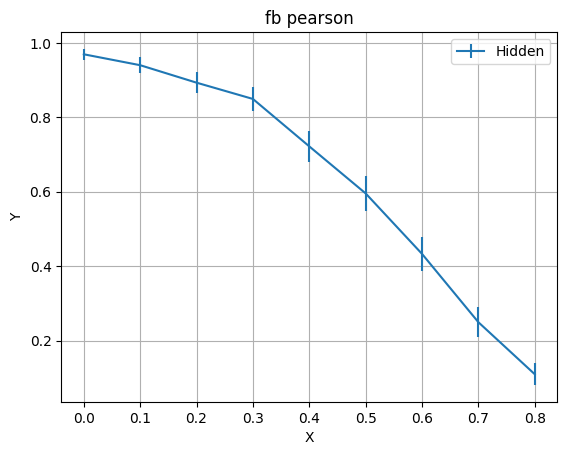

In [3]:
from math import sqrt
from matplotlib import pyplot as plt
from numpy import mean, std
import numpy as np

graph_type = "fb"
loc_type = "pearson"
dj_list = np.linspace(0, 0.8, 9)
precs = []
errs = []

for dj in dj_list:
    path = f"data/mod_hide_dj{int(dj*100)}_{graph_type}_{loc_type}_r30_beta95.csv"
    with open(path, "r") as file:
                lines = file.readlines()[2:]
                prec = []
                for line in lines:
                    prec.append(float(line.split(',')[1]))
                precs.append(mean(prec))
                errs.append(3*std(prec) / sqrt(len(prec)))

precs = np.array(precs)
errs = np.array(errs)

# plt.plot(dj_list, precs, "sb", label="Mean Value")
plt.errorbar(dj_list, precs, errs, label="Hidden")
# plt.fill_between(dj_list, precs - errs, precs + errs, color='blue', alpha=0.2, label="Standard Error")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title(f"{graph_type} {loc_type}")
plt.grid()
plt.show()

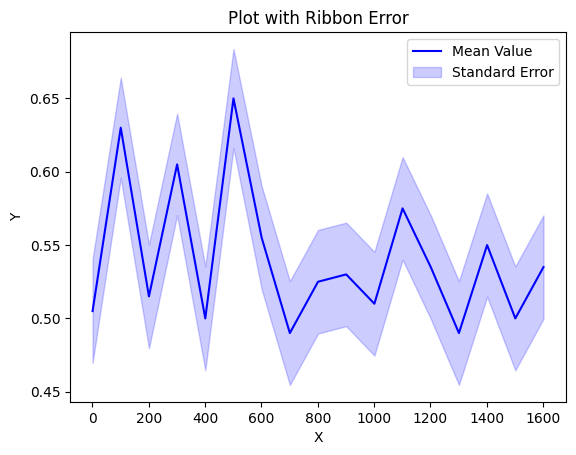

In [ ]:
from math import sqrt
from matplotlib import pyplot as plt
from numpy import mean, std
import numpy as np

graph_type = "ba"
beta = 0.5
r = 0.2
loc_type = "pearson"
modify_type = "add"
reconstruct_type = "cn"

dj = 0.2
A = [1]
H = range(1, 1602, 100)

precs = []
errs = []
for hide_thresh in H:
    for add_thresh in A:
        path = f"data/rec_{graph_type}_{hide_thresh}_{add_thresh}_{loc_type}_{modify_type}_{reconstruct_type}.csv"
        with open(path, "r") as file:
            lines = file.readlines()[2:]
            prec = []
            for line in lines:
                prec.append(float(line.split(',')[1]))
            precs.append(mean(prec))
            errs.append(std(prec) / sqrt(len(prec)))

precs = np.array(precs)
errs = np.array(errs)

plt.plot(H, precs, label="Mean Value", color='blue')
plt.fill_between(H, precs - errs, precs + errs, color='blue', alpha=0.2, label="Standard Error")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Plot with Ribbon Error")

# Show plot
plt.show()


In [1]:
from math import sqrt
from matplotlib import pyplot as plt
from numpy import mean, std
import numpy as np
import pandas as pd

graph_type = "fb"
beta = 0.95
r = 0.3
loc_type = "gmla"
reconstruct_type = "srw"
dj = 0.2

path = f"data/rec_{reconstruct_type}_dj{int(dj*100)}_{graph_type}_{loc_type}_r{int(100*r)}_beta{int(100*beta)}.csv"
df = pd.read_csv(path,engine="python", skiprows=1)
X = df["k"]
Y = df["prec"]
errs = df["std_err"]

plt.errorbar(X, Y, errs, label="Mean Value")

plt.xlabel("k")
plt.ylabel("Precyzja")
plt.legend()
plt.title(path)
plt.grid()

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data/rec_srw_dj20_fb_gmla_r30_beta95.csv'

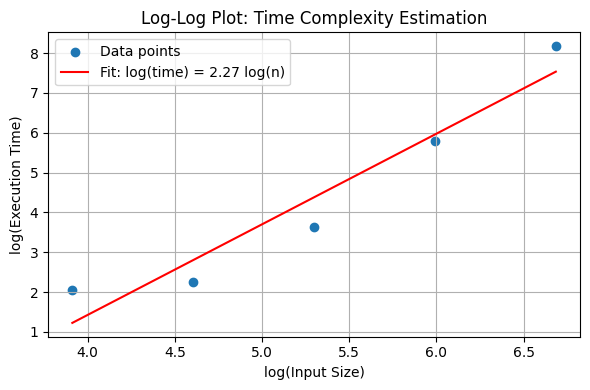

Estimated polynomial time complexity: O(n^2.27)
25089.6550937419


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_polynomial_exponent(input_sizes, exec_times, plot=True):
    input_sizes = np.array(input_sizes, dtype=np.float64)
    exec_times = np.array(exec_times, dtype=np.float64)

    log_input = np.log(input_sizes)
    log_time = np.log(exec_times)

    coeffs = np.polyfit(log_input, log_time, 1)
    exponent = coeffs[0]

    if plot:
        plt.figure(figsize=(6, 4))
        plt.scatter(log_input, log_time, label='Data points')
        plt.plot(log_input, np.polyval(coeffs, log_input), color='red', label=f'Fit: log(time) = {exponent:.2f} log(n)')
        plt.xlabel('log(Input Size)')
        plt.ylabel('log(Execution Time)')
        plt.title('Log-Log Plot: Time Complexity Estimation')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return exponent

# Example usage
input_sizes = [50, 100, 200, 400, 800]
exec_times = [7.8, 9.57, 37.96, 325, 3551]

exponent = estimate_polynomial_exponent(input_sizes, exec_times)
print(f"Estimated polynomial time complexity: O(n^{exponent:.2f})")

print(800**exponent /160)


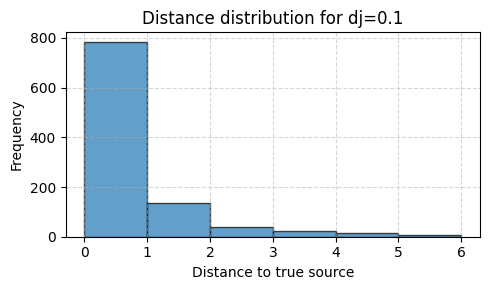

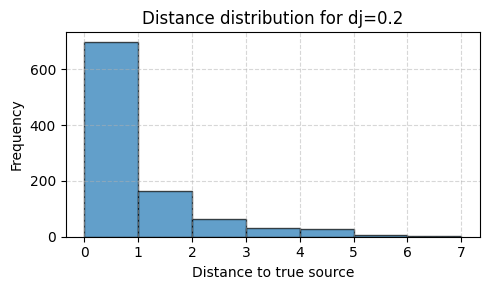

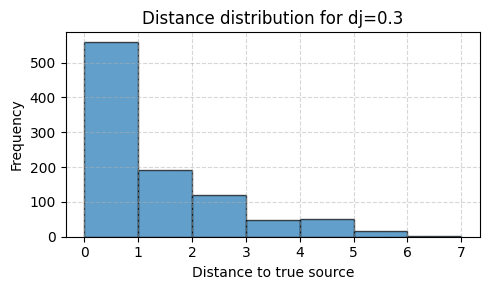

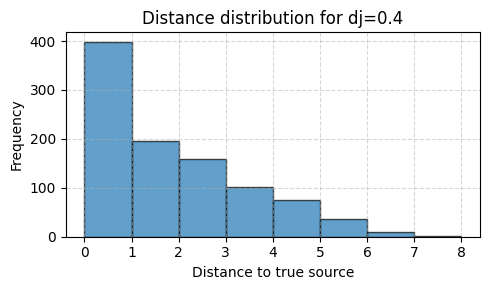

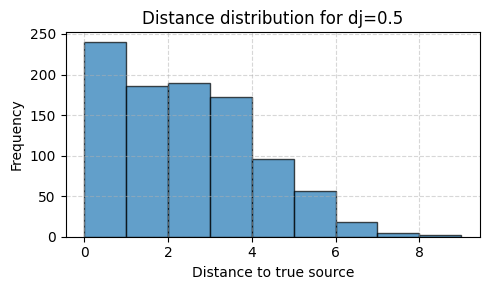

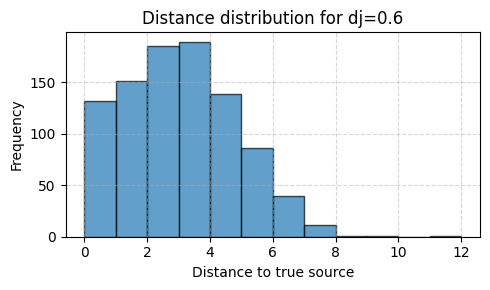

Summary statistics:
     count      mean       std  min  25%  50%  75%   max
dj                                                      
0.1  999.0  0.369369  0.867299  0.0  0.0  0.0  0.0   5.0
0.2  993.0  0.549849  1.063404  0.0  0.0  0.0  1.0   6.0
0.3  989.0  0.886754  1.285750  0.0  0.0  0.0  1.0   6.0
0.4  976.0  1.404713  1.561439  0.0  0.0  1.0  2.0   7.0
0.5  963.0  1.968847  1.664433  0.0  1.0  2.0  3.0   8.0
0.6  936.0  2.584402  1.779062  0.0  1.0  2.5  4.0  11.0


In [2]:
from helpers import *

analyze_distance_distributions(
        modify_type="hide",
        graph_type="email",
        loc_type="pearson",
        r=0.1,
        beta=0.95,
        dj_values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    )

In [48]:
import networkx as nx
import numpy as np
import random



def rwr_scores(G, alpha=0.5, eps=1e-6, max_iter=1000):
    n = G.number_of_nodes()
    A = nx.to_numpy_array(G, dtype=float)
    degs = np.sum(A, axis=1)
    degs[degs == 0] = 1.0
    M_T = (A / degs[:, None]).T  # column-stochastic

    all_p = np.zeros((n, n))
    for v in range(n):
        p_curr = np.zeros(n)
        R = np.zeros(n)
        R[v] = 1 - alpha
        for _ in range(max_iter):
            p_t = alpha * (M_T @ p_curr) + R
            if np.linalg.norm(p_t - p_curr, 1) < eps:
                p_curr = p_t
                break
            p_curr = p_t
        all_p[v, :] = p_curr

    scores = {}
    for i in range(n):
        for j in range(i + 1, n):
            if not G.has_edge(i, j):
                scores[(i, j)] = all_p[i, j] + all_p[j, i]
    return scores


def precision_auc(G, alpha=0.5, num_folds=5, samples_auc=100000):
    edges = list(G.edges())
    random.shuffle(edges)
    fold_size = len(edges) // num_folds
    n = G.number_of_nodes()

    precs, aucs = [], []
    non_edges = [(i, j) for i in range(n) for j in range(i + 1, n) if not G.has_edge(i, j)]

    for i in range(num_folds):
        eval_edges = edges[i*fold_size:(i+1)*fold_size]
        train_edges = [e for e in edges if e not in eval_edges]

        G_train = nx.Graph()
        G_train.add_nodes_from(range(n))
        G_train.add_edges_from(train_edges)

        scores = rwr_scores(G_train, alpha=alpha)

        # --- Precision ---
        top_k = fold_size
        ranked = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        top_pairs = [p for p, _ in ranked[:top_k]]
        tp = sum(1 for e in eval_edges if (e in top_pairs or (e[1], e[0]) in top_pairs))
        precs.append(tp / top_k)

        # --- AUC ---
        auc_nom = 0
        for _ in range(samples_auc):
            pos = random.choice(eval_edges)
            if pos[0] > pos[1]:
                pos = (pos[1], pos[0])
            neg = random.choice(non_edges)
            s_pos = scores.get(pos, 0)
            s_neg = scores.get(neg, 0)
            if s_pos > s_neg:
                auc_nom += 1
            elif s_pos == s_neg:
                auc_nom += 0.5
        aucs.append(auc_nom / samples_auc)

    return np.mean(precs), np.mean(aucs)


# Example usage:
if __name__ == "__main__":
    path = '../networks/cel_edges.txt'
    G = nx.Graph()
    with open(path, 'r') as f:
        for line in f:
            if line.strip():
                u, v = map(int, line.strip().split()[:2])
                G.add_edge(u, v)
    prec, auc = precision_auc(G, alpha=0.5, num_folds=5)
    print("Precision:", prec)
    print("AUC:", auc)


Precision: 0.07878787878787878
AUC: 0.82637


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_rec_prec_grid(beta, r, method):
    """
    Tworzy wykresy: reconstruct_type w wierszach (methods), graph_type w kolumnach.
    X: dj, Y: precision ± std_err.
    
    Parameters
    ----------
    beta : float
        Wartość beta (np. 0.95).
    r : float
        Wartość r (np. 0.1).
    method : str
        Np. ["lptva", "gmla", "pearson"].
    """
    dj_list = np.linspace(0, 0.6, 7)
    reconstruct_type_list = ["ra", "srw"]
    graph_list = ["fb", "email", "cal"]
    theta_idxs = [0, 1, 2]
    line_colors = ["#4A6FA5", "#D08C60", "#5B8C5A"]
    line_labels = ["0", "0.25", "0.5"]
    
    nrows = len(reconstruct_type_list)
    ncols = len(graph_list)
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows), sharex=True, sharey=True)

    for row, reconstruct_type in enumerate(reconstruct_type_list):
        for col, graph in enumerate(graph_list):
            ax = axes[row, col] if nrows > 1 else axes[col]
            
            Y, errs = np.array((len(dj_list), len(theta_idxs))), np.array((len(dj_list), len(theta_idxs)))
            for i, dj in enumerate(dj_list):
                fname = f"rec_{reconstruct_type}_dj{int(dj*100)}_{graph}_{method}_r{int(r*100)}_beta{int(beta*100)}.csv"
                path = os.path.join("data", fname)
                if not os.path.exists(path):
                    continue
                
                df = pd.read_csv(path, skiprows=1)
                if dj == 0:
                    Y[0, :] = np.repeat(df["prec"][0], len(theta_idxs))
                    errs[0,:] = np.repeat(df["prec_err"][0], len(theta_idxs))
                else:
                    Y[i, :] = df["prec"][theta_idxs]
                    errs[i, :] = df["prec_err"][theta_idxs]
            
            for j, (theta_idx, color, label) in enumerate(zip(theta_idxs, colors, labels)):
                line, = ax.plot(dj_list, Y[:, j], label=label, color=color)
                ax.fill_between(dj_list, Y[:, j] - errs[:, j], Y[:, j] + errs[:, j],
                            color=line.get_color(), alpha=0.2)
            
            ax.legend()
            if row == 0:
                ax.set_title(graph)
            if col == 0:
                ax.set_ylabel(method)
            if row == nrows - 1:
                ax.set_xlabel(r"$d_j$")

    plt.tight_layout(rect=[0,0.05,1,1])
    plt.show()
